### Two Stream Instability
Simulated in quasi-2D with only one cell in y-axis.

Parameters are based on the simulation of two_stream_ee_es.inp distributed with XOOPIC.
Two electron beams with opposite velocities interact with each other. As in XOOPIC simulation, the ions (He+) are also a kinetic species placed in the same positions as initial electrons.

In [1]:
using PyPlot
using PyCall
ov = pyimport("openpmd_viewer")
ts = ov.OpenPMDTimeSeries("/tmp/10_two_streams/hdf5")
tps = 1e12 * ts.t # time in picoseconds
nothing

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/bach/.julia/packages/PyPlot/XHEG0/src/init.jl:192


In [2]:
rcParams = PyDict(matplotlib["rcParams"])
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = "Routed Gothic"
rcParams["font.size"] = 15
rcParams["axes.linewidth"] = 1
rcParams["scatter.marker"] = "o"
rcParams["xtick.direction"] = "in"
rcParams["ytick.direction"] = "in"
nothing

In [3]:
_, metadata = ts.get_field("phi")
Lx, Ly = metadata.ymax, metadata.xmax
dx, dy = metadata.dy, metadata.dx
xs, ys = metadata.y, metadata.x
nx, ny = length(xs), length(ys)
e  = ts.get_particle(["id"], "e-")
np = length(e[1])
nothing

In [4]:
pt = ov.ParticleTracker(ts, iteration=1, select=Dict("id"=>[0, np]),
    species="e-", preserve_particle_index=false)
it, np = length(ts.iterations), pt.N_selected;
px = zeros(it, np)
py = zeros(it, np)
vx = zeros(it, np)
vy = zeros(it, np)
Ex = zeros(it, ny, nx)
phi = zeros(it, ny, nx)
rho = zeros(it, ny, nx)
nHe = zeros(it, ny, nx)
ne  = zeros(it, ny, nx)
nothing

In [5]:
using ProgressMeter
@showprogress for i=1:it
    x, y, ux, uy = ts.get_particle( ["x", "y", "ux", "uy"],
        select=pt, iteration=ts.iterations[i], species="e-")
    px[i, :] = x[:]
    py[i, :] = y[:]
    vx[i, :] = ux[:]
    vy[i, :] = uy[:]
    Ex[i, :, :],= ts.get_field("E", iteration=ts.iterations[i], coord="x")
   phi[i, :, :],= ts.get_field("phi", iteration=ts.iterations[i])
   rho[i, :, :],= ts.get_field("rho", iteration=ts.iterations[i])
   nHe[i, :, :],= ts.get_field("nHe+", iteration=ts.iterations[i])
    ne[i, :, :],= ts.get_field("ne-", iteration=ts.iterations[i])
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:54


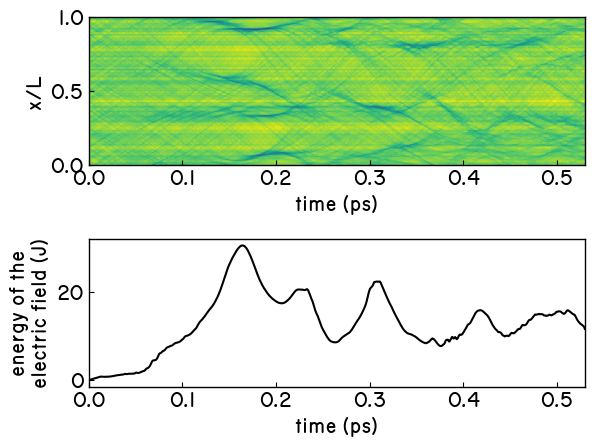

In [6]:
subplot(2,1,1)
ρ = rho[:,1,:]'
levels = range(minimum(ρ), maximum(ρ), length=128)
contourf(tps, xs/Lx, ρ, levels)
xlabel("time (ps)")
ylabel("x/L")

subplot(2,1,2)
ε0 = 8.8541878128e-12 # F/m
UE = 0.5ε0*dx*sum(Ex[:,1,:].^2; dims=2)
plot(tps, UE, "k")
xlabel("time (ps)")
ylabel("energy of the\nelectric field (J)")
margins(x=0.0)
subplots_adjust(hspace=0.5)

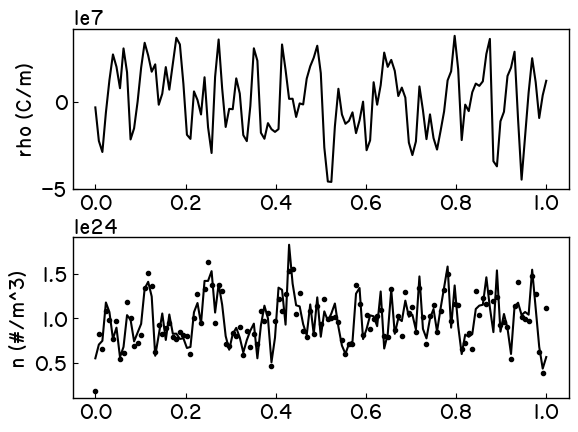

In [7]:
subplot(2,1,1); plot(xs/Lx,  Ex[1,1,:], "k-"); ylabel("rho (C/m)")
subplot(2,1,2); plot(xs/Lx,  ne[1,1,:], "k.",
                     xs/Lx, nHe[1,1,:], "k-"); ylabel("n (#/m^3)")
subplots_adjust(wspace=0.0, hspace=0.3)

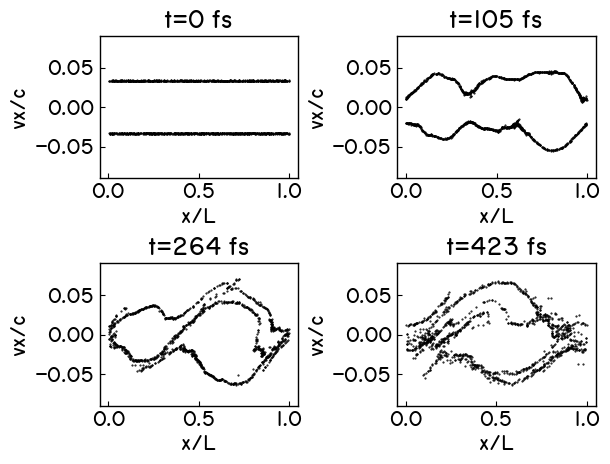

4-element Array{Float64,1}:
 0.0
 0.10549974296535015
 0.26454458160658156
 0.42358942024781293

In [13]:
subplot(2,2,1); plot(px[  1,:]/Lx, vx[  1,:], "k.", markersize=1); xlabel("x/L"); ylabel("vx/c"); ylim(-0.09, +0.09); title("t=0 fs");
subplot(2,2,2); plot(px[200,:]/Lx, vx[200,:], "k.", markersize=1); xlabel("x/L"); ylabel("vx/c"); ylim(-0.09, +0.09); title("t=105 fs");
subplot(2,2,3); plot(px[500,:]/Lx, vx[500,:], "k.", markersize=1); xlabel("x/L"); ylabel("vx/c"); ylim(-0.09, +0.09); title("t=264 fs");
subplot(2,2,4); plot(px[800,:]/Lx, vx[800,:], "k.", markersize=1); xlabel("x/L"); ylabel("vx/c"); ylim(-0.09, +0.09); title("t=423 fs");
subplots_adjust(wspace=0.5, hspace=0.6)
i = [1, 200, 500, 800]
tps[i]